# Udacity的AI for robots课程
此文是第一部分定位的内容与练习代码

localization：
定位很重要，传统GPS精度只有2-10m，无人驾驶车需要的定位精度是2-10cm，一般的解决方法是预先存储地图和道路信息，再用概率去匹配

例如，一段数组[红，绿，绿，红，红]，在初始时，所在位置都有可能，p[i]=0.2
经过观察，是红的，那么，第1,4,5的概率就更高，2,3的概率就很低，再向右走一步，是绿色，那么之前在第1个的概率就非常大。


## 1.1引入信度

### 1.1.1假设有五个格子，那么每个格子的概率都相等，为：

In [3]:
# Modify the empty list, p, so that it becomes a UNIFORM probability
# distribution over five grid cells, as expressed in a list of 
# five probabilities.

p = [0.2,0.2,0.2,0.2,0.2]

print p


[0.2, 0.2, 0.2, 0.2, 0.2]


### 1.1.2如果有n个格子，那么概率为：
初始化机器人对格子的初始信度

In [6]:
n = input()
p = []
p = [1./n]*n
print p

5
[0.2, 0.2, 0.2, 0.2, 0.2]


In [7]:
n = input()
p = []
for i in range(n):
    p.append(1./n)
print p

5
[0.2, 0.2, 0.2, 0.2, 0.2]


## 1.2结合道路结构

### 1.2.1仅结合道路结构
假设格子颜色分别为：('green','red','red','green','green')
机器人目前可以感知颜色，当感知的颜色与格子实际颜色对应时，概率上升，不对应时下降
用乘法来解决。pHit=0.6，pMiss = 0.2

In [8]:
p = [0.2,0.2,0.2,0.2,0.2]
pHit = 0.6
pMiss = 0.2
p[0] = p[0]*pMiss
p[1] = p[1] * pHit
p[2] = p[2] * pHit
p[3] = p[3] * pMiss
p[4] = p[4] * pMiss

#p = [p[0]*pMiss,p[1]*pHit,p[2]*pHit,p[3]*pMiss,p[4]*pMiss]

print sum(p) 
a = 1./sum(p)

p = [x*a for x in p]     #列表每个值都乘上一个数
print p 

0.36
[0.1111111111111111, 0.33333333333333326, 0.33333333333333326, 0.1111111111111111, 0.1111111111111111]


### 1.2.2定义道路结构world，与观察度量Z
如果观察与道路相符，则概率变大(0.6)，若不相符，则变小(0.2)
计算，使得概率之和为1。def 感知函数sense()

In [9]:
p = [0.2,0.2,0.2,0.2,0.2]
world = ['green','red','red','green','green']
Z = 'red'
pHit = 0.6
pMiss = 0.2

def sense(p,Z):
    q = []
    for i in range(len(p)):
        Hit = (Z == world[i])
        q.append(p[i]*(Hit * pHit + (1-Hit) * pMiss))
    q = [x*(1./sum(q)) for x in q]    
    return q
print sense(p,Z)


[0.1111111111111111, 0.33333333333333326, 0.33333333333333326, 0.1111111111111111, 0.1111111111111111]


### 1.2.3将观察量增加
现在，使观察向量Z为['red','green']

In [10]:
p = [0.2,0.2,0.2,0.2,0.2]
world = ['green','red','red','green','green']
Z = ['red','green']
pHit = 0.6
pMiss = 0.2

def sense(p,Z):
    q = []
    for i in range(len(p)):
        Hit = (Z == world[i])
        q.append(p[i]*(Hit * pHit + (1-Hit) * pMiss))
    q = [x*(1./sum(q)) for x in q]    
    return q

for k in range(len(Z)):
    p = sense(p,Z[k])
    
print p


[0.20000000000000007, 0.2, 0.2, 0.20000000000000007, 0.20000000000000007]


### 1.2.4移动机器人
上面的出现问题，每个都是0.2，都是乘上0.6，再乘上0.2，因为格子没有移动，而两次观察到相反的结果
现在，将格子都向右移动一格,相当于机器人向左走

In [11]:
p = [0.2,0.2,0.2,0.2,0.2]
world = ['green','red','red','green','green']
Z = ['red','green']
pHit = 0.6
pMiss = 0.2

def sense(p,Z):
    q = []
    for i in range(len(p)):
        Hit = (Z == world[i])
        q.append(p[i]*(Hit * pHit + (1-Hit) * pMiss))
    q = [x*(1./sum(q)) for x in q]    
    return q

for k in range(len(Z)):
    print world
    p = sense(p,Z[k])
    world.insert(0,world[4])
    world.pop()
       


print p

['green', 'red', 'red', 'green', 'green']
['green', 'green', 'red', 'red', 'green']
[0.1578947368421053, 0.4736842105263158, 0.15789473684210528, 0.05263157894736844, 0.1578947368421053]


In [12]:
#将格子向左移动一格，相当于机器人向右走
p = [0.2,0.2,0.2,0.2,0.2]
world = ['green','red','red','green','green']
Z = ['red','green','green','green','red','red','green']
pHit = 0.8
pMiss = 0.2

def sense(p,Z):
    q = []
    for i in range(len(p)):
        Hit = (Z == world[i])
        q.append(p[i]*(Hit * pHit + (1-Hit) * pMiss))
    q = [x*(1./sum(q)) for x in q]    
    return q

for k in range(len(Z)):
    #print world
    p = sense(p,Z[k])
    #world.insert(0,world[4])
    #world.pop()
    world.append(world[0])
    world.pop(0)

print p

[0.00023646252069047053, 0.015133601324190114, 0.9685504847481673, 0.015133601324190114, 0.0009458500827618821]


### 1.2.5使用python操纵列表向左或向右循环的方法：

In [13]:
#野路子，不知道为什么p经过函数会变化
p = [1,0,0,0,0,0]
#向左
U = 2
def move_right(p,U):
    q1 = p
    for i in range(U):
        q1.insert(0,q1.pop())
    return q1
#向右
def move_left(p,U):
    q = p
    for i in range(U):
        
        q.append(q.pop(0))
    return q
print move_right(p,U)
print p
print move_left(p,U)
print move_left(p,U)

[0, 0, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 0]
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0]


In [14]:
#udacity方法
p = [0,0,0,1,0,0,0]
U = 2
def move_right(p,U):
    q = []
    for i in range(len(p)):
        q.append(p[(i-U)%len(p)])
    return q
#向右移动两位
print move_right(p,U)
#不变
print p
#向左移动两位
print move_left(p,U)
def move_left(p,U):
    q = []
    for i in range(len(p)):
        q.append(p[(U+i)%(len(p))])
    return q



[0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0]


## 1.3Inaccurate Robot Motion
非准确机器人移动，假设机器人计划移动U步，P(走准确)=0.8，P（少走一步）=0.1，P(多走一步)=0.1
例如，当前先验分布[0,1,0,0,0]，U=2时，后验分布应该是[0,0,0.1,0.8,0.1]

In [15]:
#Modify the move function to accommodate the added 
#probabilities of overshooting or undershooting 
#the intended destination.

p=[0, 1, 0, 0, 0]
world=['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'green']
pHit = 0.6
pMiss = 0.2
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

def sense(p, Z):
    q=[]
    for i in range(len(p)):
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
    s = sum(q)
    for i in range(len(q)):
        q[i] = q[i] / s
    return q

def move(p, U):
    q = []
    for i in range(len(p)):
        q.append(p[(i-U)%len(p)])
    return q
    
p = move(p,1)

def inaccurate(p,U):
    q = [0]*len(p)   #如果不初始化q[]，就会提示超出范围
    for i in range(len(p)):
        q[(i+U)%(len(p))] = p[(i+U-1)%(len(p))]*pUndershoot + p[(i+U)%(len(p))] * pExact + p[(i+U+1)%(len(p))]*pOvershoot
    return q
print inaccurate(p,1)
    

[0.0, 0.1, 0.8, 0.1, 0.0]


In [16]:
#Modify the move function to accommodate the added 
#probabilities of overshooting or undershooting 
#the intended destination.

p=[0, 1, 0, 0, 0]
world=['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'green']
pHit = 0.6
pMiss = 0.2
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

def sense(p, Z):
    q=[]
    for i in range(len(p)):
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
    s = sum(q)
    for i in range(len(q)):
        q[i] = q[i] / s
    return q

def move(p, U):
    q = []
    for i in range(len(p)):
        s = p[(i-U)%len(p)]*pExact + p[(i-U-1)%len(p)]*pOvershoot + p[(i-U+1)%len(p)]*pUndershoot
        q.append(s)
    return q
    
print move(p,1)


[0.0, 0.1, 0.8, 0.1, 0.0]


In [17]:
#[0,1,0,0,0,0]移动无数多次，如果考虑不准确性，最终结果都是0.2
#以下是移动1k次的结果
#write code that moves 1000 times and then prints the 
#resulting probability distribution.

p=[0, 1, 0, 0, 0]
world=['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'green']
pHit = 0.6
pMiss = 0.2
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

def sense(p, Z):
    q=[]
    for i in range(len(p)):
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
    s = sum(q)
    for i in range(len(q)):
        q[i] = q[i] / s
    return q

def move(p, U):
    q = []
    for i in range(len(p)):
        s = pExact * p[(i-U) % len(p)]
        s = s + pOvershoot * p[(i-U-1) % len(p)]
        s = s + pUndershoot * p[(i-U+1) % len(p)]
        q.append(s)
    return q
#
# ADD CODE HERE
#
for i in range(1000):
    p = move(p,1)
print p

[0.20000000000000365, 0.20000000000000373, 0.20000000000000365, 0.2000000000000035, 0.2000000000000035]


### 1.3.1小结
现在，自动驾驶定位编程几乎完成了
整个系统处在不停的move，sense之中，在不停的move中，机器人由于不准确性位置变得延展，概率趋于均衡；
在sense中，机器人对当前位置不断感知，概率变得集中
先感知，再移动位置

In [18]:
#Given the list motions=[1,1] which means the robot 
#moves right and then right again, compute the posterior 
#distribution if the robot first senses red, then moves 
#right one, then senses green, then moves right again, 
#starting with a uniform prior distribution.

p=[0.2, 0.2, 0.2, 0.2, 0.2]
world=['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'green','green','green','red']
motions = [1,1,1,1,1]
pHit = 0.6
pMiss = 0.2
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

def sense(p, Z):
    q=[]
    for i in range(len(p)):
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
    s = sum(q)
    for i in range(len(q)):
        q[i] = q[i] / s
    return q

def move(p, U):
    q = []
    for i in range(len(p)):
        s = pExact * p[(i-U) % len(p)]
        s = s + pOvershoot * p[(i-U-1) % len(p)]
        s = s + pUndershoot * p[(i-U+1) % len(p)]
        q.append(s)
    return q
#
# ADD CODE HERE
#
for i in range(len(motions)):
    p = sense(p,measurements[i])
    p = move(p,motions[i])
print p        

[0.044387664787064234, 0.16540598125547146, 0.5320745790205469, 0.21929271911529943, 0.038839055821618014]


### 1.3.2使用概率分布直方图观察位置可能性

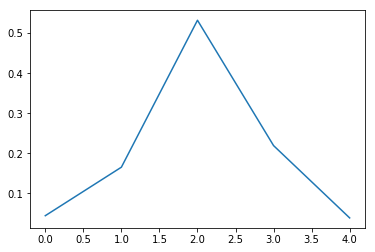

In [19]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(5)
y = p

plt.plot(x, y)

Bayes Rule
P(X|Z) = P(Z|X)P(X)/P(Z)
P(Z) = sum(P(Z|Xi))

Total Probality
P(A)= sum(P(A|B)*P(B))

需要注意的是内存使用量，三维空间物体运动有6个方向：X,Y,Z,pitch,roll,yaw，假设每个观察量有20个观察值，联合表的内存占用量是20^6

## 1.4总结：

Bayes Rulue：
    P(A|B) = P(B|A)*P(A)/P(B)

Totol Probality:
    P(A) = sum(P(A|Bi))